<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Decision Tree Classifier</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Decision Tree Classifier</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Decision Tree Classifier</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Признаки**
- **RowNumber** — индекс строки в данных
- **CustomerId** — уникальный идентификатор клиента
- **Surname** — фамилия
- **CreditScore** — кредитный рейтинг
- **Geography** — страна проживания
- **Gender** — пол
- **Age** — возраст
- **Tenure** — сколько лет человек является клиентом банка
- **Balance** — баланс на счёте
- **NumOfProducts** — количество продуктов банка, используемых клиентом
- **HasCrCard** — наличие кредитной карты
- **IsActiveMember** — активность клиента
- **EstimatedSalary** — предполагаемая зарплата

**Целевой признак**
- **Exited** — факт ухода клиента

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import scipy
import seaborn as sns
from sklearn import metrics
import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

from tqdm.notebook import tqdm

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [5]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

В столбце 'Tenure' заменим пропуски на 0 так вероятнее всего пропуск свидетельствует о том, что недвижимости нет:

In [6]:
df['Tenure'] = df['Tenure'].fillna(0).astype('int')

CustomerId, фамилии клиентов и индекс строки в данных не столь важны и их можно удалить: 

In [7]:
df = df.drop(['Surname', 'RowNumber','CustomerId'], axis=1)

Поправим названия стобцов:

In [8]:
df = df.rename(columns={'CreditScore': 'Credit_Score','NumOfProducts':'Num_Of_Products','HasCrCard':'Has_Cr_Card','IsActiveMember':'Active_Member','EstimatedSalary':'Estimated_Salary'})

Кодирование данных:

In [9]:
data_ohe = pd.get_dummies(df, drop_first=True)

In [10]:
data_ohe.head()

,Credit_Score,Age,Tenure,Balance,Num_Of_Products,Has_Cr_Card,Active_Member,Estimated_Salary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Разделим на 2 выборки (обучающую и валидационную):

In [11]:
df_train, df_valid = train_test_split(data_ohe, test_size=0.1, random_state=12345)

Посмотрим размер таблицы:

In [12]:
data_ohe.shape

(10000, 12)

In [13]:
print('Кол-во строк в обучающей выборке:', df_train.shape[0])
print('Кол-во строк в валидационной выборке:', df_valid.shape[0])

Кол-во строк в обучающей выборке: 9000
Кол-во строк в валидационной выборке: 1000


Добавим третью выборку для теста (того же размера, что и валидационная):

In [14]:
df_test_size = df_valid.shape[0] / df_train.shape[0]
df_train, df_test = train_test_split(df_train, test_size=df_test_size, random_state=12345)

In [15]:
print('Кол-во строк в обучающей выборке:', df_train.shape[0])
print('Кол-во строк в валидационной выборке:', df_valid.shape[0])
print('Кол-во строк в тестовой выборке:', df_test.shape[0])

Кол-во строк в обучающей выборке: 8000
Кол-во строк в валидационной выборке: 1000
Кол-во строк в тестовой выборке: 1000


Разделим на обучающие признаки и целевые:

In [16]:
features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']

In [17]:
features_valid = df_valid.drop(['Exited'], axis=1)
target_valid = df_valid['Exited']

In [18]:
features_test = df_test.drop(['Exited'], axis=1)
target_test = df_test['Exited']

Масштабируем признаки:

In [19]:
numeric = ['Credit_Score', 'Age', 'Tenure', 'Balance', 'Num_Of_Products', 'Has_Cr_Card', 'Active_Member', 'Estimated_Salary']

In [20]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

### Вывод

- В столбце 'Tenure' заменили пропуски на 0 так вероятнее всего пропуск свидетельствует о том, что недвижимости нет
- Т.к. каждый клиент идентифицируется по Customer_Id, то фамилии клиентов и индекс строки в данных не столь важны и были удалены
- Кодировали данные, создали выборки: обучающую, валидационную и тестовую
- Разделили на обучающие признаки и целевые
- Масштабировали цифровые признаки


## Исследование задачи

Проверим сбалансированность классов:

In [21]:
df['Exited'].value_counts(normalize= True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Для отслеживания прогресса при поиске используем библиотеку tqdm

### Decision Tree Classifier

In [22]:
best_model_tree = None
best_result_tree = 0
for depth in tqdm(range(1, 15), desc='Depth loop'):
    for cr in tqdm(['gini', 'entropy'], desc='Criterion loop', leave=False):
        for min_smp in tqdm(range(1, 50, 10), desc='Min_smp_leaf', leave=False):
            model_DecisionTree = DecisionTreeClassifier(random_state=5, min_samples_leaf = min_smp, max_depth=depth, criterion = cr)
            model_DecisionTree.fit(features_train, target_train) 
            valid_predictions_tree = model_DecisionTree.predict(features_valid) 
            result = model_DecisionTree.score(features_valid, target_valid)    
            if result > best_result_tree:
                best_model_tree = model_DecisionTree
                best_result_tree = result

In [23]:
print("F1:", f1_score(target_valid, valid_predictions_tree),
     "Параметры лучшей модели:", best_model_tree, sep='\n')

F1:
0.5698005698005697
Параметры лучшей модели:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')


In [24]:
probabilities_valid = model_DecisionTree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [25]:
print("AUC ROC:", roc_auc_score(target_valid, probabilities_one_valid))

AUC ROC: 0.8351732795232174


Не удалось достигнуть нужных значений f1 (0.56). Auc Roc = 0.83

### Random Forest Classifier

Этот алгоритм обучает большое количество независимых друг от друга деревьев, а потом принимает решение на основе голосования. "Случайный лес" помогает улучшить результат предсказания и избежать переобучения.

Попробуем перебрать вложенными циклами:

In [26]:
best_model_tree = None
best_result_tree = 0
for depth in tqdm(range(1, 15), desc='Depth loop'):
    for n_est in tqdm(range(10, 101, 10), desc='Est loop', leave=False):
        for n_features in tqdm(['log2', 'sqrt'], desc='n_features loop', leave=False):
            model_RandomForest = RandomForestClassifier(random_state=5, n_estimators=n_est, max_features=n_features, max_depth=depth)
            model_RandomForest.fit(features_train, target_train) 
            valid_predictions_tree = model_RandomForest.predict(features_valid) 
            result = model_RandomForest.score(features_valid, target_valid)    
            if result > best_result_tree:
                best_model_tree = model_RandomForest
                best_result_tree = result

In [27]:
print("F1:", f1_score(target_valid, valid_predictions_tree), 
      "Параметры лучшей модели:", best_model_tree, sep='\n') 

F1:
0.5953757225433526
Параметры лучшей модели:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=13, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)


In [28]:
probabilities_valid = model_RandomForest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [29]:
print("AUC ROC:", roc_auc_score(target_valid, probabilities_one_valid))

AUC ROC: 0.8648548769328235


Удалось достигнуть показателя f1 = 0.59, auc roc = 0.86 (тоже пока наивысший показатель)

### Logistic Regression

Обучение модели и проверка на валидационной выборке:

In [30]:
model_logistic = LogisticRegression(solver='liblinear',random_state=5)
model_logistic.fit(features_train, target_train)
valid_predictions_logistic = model_logistic.predict(features_valid)

In [31]:
print("F1:", f1_score(target_valid, valid_predictions_logistic))

F1: 0.28070175438596495


In [32]:
probabilities_valid = model_logistic.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [33]:
print("AUC ROC:", roc_auc_score(target_valid, probabilities_one_valid))

AUC ROC: 0.768706445482062


Самые низкие показатели f1 (0.28) и auc roc (0.76)

### Вывод

- Проверка баланса классов показала, что есть большой дисбаланс классов, примерно в 4 раза.
- проверили работу моделей:
  - На модели "Решающий лес" f1 = 0.56, auc roc = 0.83
  - На модели "Случайный лес" получилось достичь значения f1 = 0.59 , auc roc = 0.86
  - На модели "Логистическая регрессия" f1 = 0.28, auc roc = 0.76
- далее сбалансируем данные и проверим работу моделей.

## Борьба с дисбалансом

Увеличим выборку через unsample:

In [34]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=5)
    
    return features_upsampled, target_upsampled

Увеличим обучающую выборку:

In [35]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Проверим размера после upsample:

In [36]:
features_zeros = features_upsampled[target_upsampled == 0]
features_ones = features_upsampled[target_upsampled == 1]
target_zeros = features_upsampled[target_upsampled == 0]
target_ones = features_upsampled[target_upsampled == 1]

In [37]:
features_zeros.shape[0]

6387

In [38]:
features_ones.shape[0]

6452

Увеличим выборку через downsample:

In [39]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=5)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=5)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=5)
    
    return features_downsampled, target_downsampled

Увеличим обучающую выборку:

In [40]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

Проверим размер после downsample:

In [41]:
features_zeros = features_downsampled[target_downsampled == 0]
features_ones = features_downsampled[target_downsampled == 1]
target_zeros = features_downsampled[target_downsampled == 0]
target_ones = features_downsampled[target_downsampled == 1]

In [42]:
features_zeros.shape[0]

1597

In [43]:
features_ones.shape[0]

1613

Обучим модели и проверим на валидационной выборке на сбалансированных данных:

### Decision Tree Classifier

Обучение модели и проверка на валидационной выборке на сбалансированных данных:

In [44]:
best_model_tree = None
best_result_tree = 0
for depth in tqdm(range(1, 15), desc='Depth loop'):
    for cr in tqdm(['gini', 'entropy'], desc='Criterion loop', leave=False):
        for min_smp in tqdm(range(1, 50, 10), desc='Min_smp_leaf', leave=False):
            model_DecisionTree = DecisionTreeClassifier(random_state=5, min_samples_leaf = min_smp, max_depth=depth, criterion = cr)
            model_DecisionTree.fit(features_upsampled, target_upsampled) 
            valid_predictions_tree = model_DecisionTree.predict(features_valid) 
            result = model_DecisionTree.score(features_valid, target_valid)    
            if result > best_result_tree:
                best_model_tree = model_DecisionTree
                best_result_tree = result

In [45]:
probabilities_valid = model_DecisionTree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [46]:
print("AUC ROC:", roc_auc_score(target_valid, probabilities_one_valid))
print("F1:", f1_score(target_valid, valid_predictions_tree))
print ("Параметры лучшей модели:", best_model_tree, sep='\n')

AUC ROC: 0.8343579154837044
F1: 0.6021897810218978
Параметры лучшей модели:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=41, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')


In [47]:
best_model_tree = None
best_result_tree = 0
for depth in tqdm(range(1, 15), desc='Depth loop'):
    for cr in tqdm(['gini', 'entropy'], desc='Criterion loop', leave=False):
        for min_smp in tqdm(range(1, 50, 10), desc='Min_smp_leaf', leave=False):
            model_DecisionTree = DecisionTreeClassifier(random_state=5, min_samples_leaf = min_smp, max_depth=depth, criterion = cr)
            model_DecisionTree.fit(features_downsampled, target_downsampled) 
            valid_predictions_tree = model_DecisionTree.predict(features_valid) 
            result = model_DecisionTree.score(features_valid, target_valid)    
            if result > best_result_tree:
                best_model_tree = model_DecisionTree
                best_result_tree = result

In [48]:
probabilities_valid = model_DecisionTree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [49]:
print("AUC ROC:", roc_auc_score(target_valid, probabilities_one_valid))
print("F1:", f1_score(target_valid, valid_predictions_tree))
print ("Параметры лучшей модели:", best_model_tree, sep='\n')

AUC ROC: 0.84840094793402
F1: 0.598825831702544
Параметры лучшей модели:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=5, splitter='best')


### Random Forest Classifier

Обучение модели и проверка на валидационной выборке на сбалансированных данных:

In [50]:
best_model_tree = None
best_result_tree = 0
for depth in tqdm(range(1, 15), desc='Depth loop'):
    for n_est in tqdm(range(10, 101, 10), desc='Est loop', leave=False):
        for n_features in tqdm(['log2', 'sqrt'], desc='n_features loop', leave=False):
            model_RandomForest = RandomForestClassifier(random_state=5, n_estimators=n_est, max_features=n_features, max_depth=depth)
            model_RandomForest.fit(features_upsampled, target_upsampled) 
            valid_predictions_tree = model_RandomForest.predict(features_valid) 
            result = model_RandomForest.score(features_valid, target_valid)    
            if result > best_result_tree:
                best_model_tree = model_RandomForest
                best_result_tree = result

In [51]:
probabilities_valid = model_RandomForest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [52]:
print("AUC ROC:", roc_auc_score(target_valid, probabilities_one_valid))
print(f1_score(target_valid, valid_predictions_tree))
print ("Параметры лучшей модели:", best_model_tree, sep='\n')

AUC ROC: 0.8583143668316948
0.608695652173913
Параметры лучшей модели:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=13, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)


In [53]:
best_model_tree = None
best_result_tree = 0
for depth in tqdm(range(1, 15), desc='Depth loop'):
    for n_est in tqdm(range(10, 101, 10), desc='Est loop', leave=False):
        for n_features in tqdm(['log2', 'sqrt'], desc='n_features loop', leave=False):
            model_RandomForest = RandomForestClassifier(random_state=5, n_estimators=n_est, max_features=n_features, max_depth=depth)
            model_RandomForest.fit(features_downsampled, target_downsampled) 
            valid_predictions_tree = model_RandomForest.predict(features_valid) 
            result = model_RandomForest.score(features_valid, target_valid)    
            if result > best_result_tree:
                best_model_tree = model_RandomForest
                best_result_tree = result

In [54]:
probabilities_valid = model_RandomForest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [55]:
print("AUC ROC:", roc_auc_score(target_valid, probabilities_one_valid))
print(f1_score(target_valid, valid_predictions_tree))
print ("Параметры лучшей модели:", best_model_tree, sep='\n')

AUC ROC: 0.8636288979093831
0.6062846580406654
Параметры лучшей модели:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)


### Logistic Regression

Обучение модели и проверка на валидационной выборке на сбалансированных данных:

In [56]:
model_LogisticRegression = LogisticRegression(random_state=5,solver='liblinear')
model_LogisticRegression.fit(features_upsampled, target_upsampled)
predicted_valid = model_LogisticRegression.predict(features_valid)

In [57]:
probabilities_valid = model_LogisticRegression.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [58]:
print("AUC ROC:", roc_auc_score(target_valid, probabilities_one_valid))
print("F1:", f1_score(target_valid, predicted_valid))

AUC ROC: 0.7742673455501068
F1: 0.5183946488294314


In [59]:
model_LogisticRegression = LogisticRegression(random_state=5,solver='liblinear')
model_LogisticRegression.fit(features_downsampled, target_downsampled)
predicted_valid = model_LogisticRegression.predict(features_valid)

In [60]:
probabilities_valid = model_LogisticRegression.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [61]:
print("AUC ROC:", roc_auc_score(target_valid, probabilities_one_valid))
print("F1:", f1_score(target_valid, predicted_valid))

AUC ROC: 0.7762500293296417
F1: 0.5084175084175084


### Вывод

На сбалансированных данных модель показывала результат лучше:
- На модели "Решающий лес" f1 = 0.602, auc roc = 0.83 (upsampled) и f1 = 0.598, auc roc = 0.84 (downsampled)
- На модели "Случайный лес" получилось достичь значения f1 = 0.608 , auc roc = 0.86 (upsampled) и f1 = 0.606, auc roc = 0.86 (downsampled)
- На модели "Логистическая регрессия" f1 = 0.518, auc roc = 0.77 (upsampled) и f1 = 0.508, auc roc = 0.77 (downsampled)

## Тестирование модели

In [62]:
test_score = {}

Объединяем датасеты для того чтобы у нас было больше данных для обучения:

In [63]:
df_features = pd.concat([features_train, features_valid], ignore_index=True)
df_target = pd.concat([target_train, target_valid], ignore_index=True)

### Decision Tree Classifier

Проверка результатов на тестовой выборке:

In [64]:
model_tree = DecisionTreeClassifier(random_state=5, max_depth=7, min_samples_leaf = 7, criterion = 'gini')
model_tree.fit(df_features, df_target) 
test_predictions_tree = model_tree.predict(features_test) 
f1 = f1_score (target_test,test_predictions_tree)

In [65]:
print('Параметр f1 при использовании метода '
      'решающее дерево на тестовой выборке составил -', f1)

Параметр f1 при использовании метода решающее дерево на тестовой выборке составил - 0.5913043478260869


In [66]:
probabilities_test = model_tree.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)

In [67]:
print('Параметр auc roc при использовании метода '
      'решающее дерево на тестовой выборке составил -', auc_roc)

Параметр auc roc при использовании метода решающее дерево на тестовой выборке составил - 0.8369445599276124


In [68]:
test_score['DecisionTreeClassifier'] = [f1 , auc_roc]

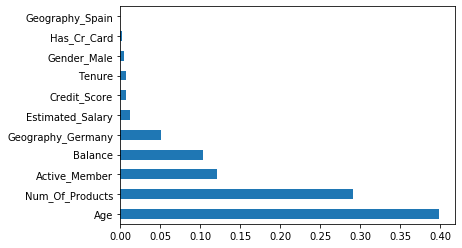

In [69]:
feat_importances = pd.Series(model_tree.feature_importances_, index=df_features.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Данная модель больше всего обращает внимание на возраст, число продуктов и активных пользователей

### Random Forest Classifier

Проверка результатов на тестовой выборке:

In [70]:
model_forest = RandomForestClassifier(random_state=5, n_estimators=35, max_depth=13, min_samples_leaf=7, criterion='gini')
model_forest.fit(df_features, df_target) 
test_predictions_forest = model_forest.predict(features_test)
f1 = f1_score(target_test, test_predictions_forest)

In [71]:
print('Параметр f1 при использовании метода '
      'случайный лес на тестовой выборке составил -', f1)

Параметр f1 при использовании метода случайный лес на тестовой выборке составил - 0.5776397515527951


In [72]:
probabilities_test = model_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)

In [73]:
print('Параметр auc roc при использовании метода '
      'случайный лес на тестовой выборке составил -', auc_roc)

Параметр auc roc при использовании метода случайный лес на тестовой выборке составил - 0.8609046000342373


In [74]:
test_score['RandomForestClassifier'] = [f1 , auc_roc]

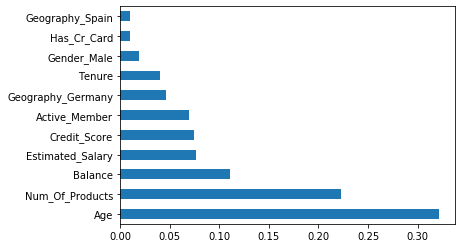

In [75]:
feat_importances = pd.Series(model_forest.feature_importances_, index=df_features.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Данная модель больше всего обращает внимание на возраст, число продуктов и зарплату

### Logistic Regression

Проверка результатов на тестовой выборке:

In [76]:
model_logistic = LogisticRegression(solver='liblinear',random_state=5)
model_logistic.fit(df_features, df_target)
prediction_logistic = model_logistic.predict(features_test)
f1 = f1_score(target_test, prediction_logistic)

In [77]:
print('Параметр f1 при использовании метода '
      'дерево решений на тестовой выборке составил -', f1)

Параметр f1 при использовании метода дерево решений на тестовой выборке составил - 0.36428571428571427


In [78]:
probabilities_test = model_logistic.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)

In [79]:
print('Параметр auc roc при использовании метода '
      'дерево решений на тестовой выборке составил -', auc_roc)

Параметр auc roc при использовании метода дерево решений на тестовой выборке составил - 0.7822381453131495


In [80]:
test_score['LogisticRegression'] = [f1 , auc_roc]

### Вывод

На тестовых данных модель дала результат хуже всего, но всё равно удалось достигнуть нужного порога f1 = 0.59:

- На модели "Решающий лес" f1 = 0.59, auc roc = 0.83
- На модели "Случайный лес" получилось достичь значения f1 = 0.577 , auc roc = 0.84
- На модели "Логистическая регрессия" f1 = 0.36, auc roc = 0.78 (наихудший результат!)

## Проверка на адекватность

Для проверки наших 3-х моделей сравним их со стандартной готовым классификатором для обучения DummyClassifier:

In [92]:
strategies = ['most_frequent', 'stratified', 'uniform']
test_scores = []

for s in strategies:
    dummy_clf = DummyClassifier(strategy=s, random_state=5)
    dummy_clf.fit(features_upsampled, target_upsampled)
    score = dummy_clf.score(features_test,  target_test)
    predict = dummy_clf.predict(features_test)
    f1 = f1_score(target_test, predict)
    test_scores.append(f1)
print(test_scores)

[0.3416252072968491, 0.31875881523272215, 0.2728551336146273]


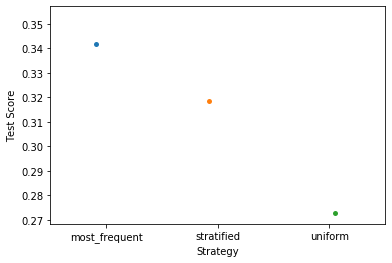

In [93]:
ax = sns.stripplot(strategies, test_scores);
ax.set(xlabel ='Strategy', ylabel ='Test Score')
plt.show()

In [83]:
dummy_clf = DummyClassifier(strategy='constant', constant=1, random_state=5)
dummy_clf.fit(features_upsampled, target_upsampled)
score = dummy_clf.score(features_test,  target_test)
predict = dummy_clf.predict(features_test)
f1 = f1_score(target_test, predict)
print(f1)

0.3416252072968491


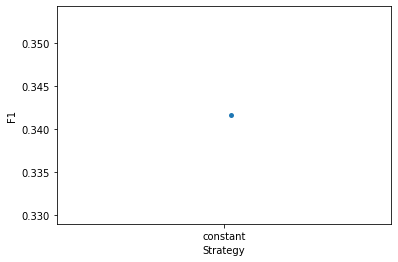

In [91]:
strategies = ['constant']
ax = sns.stripplot(strategies, f1);
ax.set(xlabel ='Strategy', ylabel ='F1')
plt.show()

In [ ]:
columns = ['F1', 'AUC']
df_score = pd.DataFrame.from_dict(data=test_score, columns=columns, orient='index')
df_score

## Общий вывод

Проверка на адекватность показала, что результат работы обученной модели лучше случайных результатов:
- Лучший результат показывает модель DecisionTree: результат на тестовой выборке 0.59, на валидационной 0,60. Хорошее качество модели также подтверждает и AUC-ROC 0.83
- Не намного хуже результат у модели RandomForest: результат на тестовой выборке 0.57, на валидационной 0,60. Хорошее качество модели также подтверждает и AUC-ROC 0.84 (даже выше чем у DecisionTree) 
- Наихудший результат у LogisticRegression: результат на тестовой выборке 0.36, на валидационной 0,51.